### 1. Identify the most isolated location’s Location Id

### Ans: LocationId 10666 in Country RU


### 2.  Identify the most isolated location’s Location Id for each country

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("locations.csv")

In [3]:
data.head()

,Country,Longitude,Latitude,LocationId
0,AD,1.53,42.51,1
1,AE,55.47,25.42,2
2,AE,55.47,25.39,3
3,AE,54.38,24.48,4
4,AE,54.54,24.51,5


In [4]:
data.describe()

,Longitude,Latitude,LocationId
count,25599.000000,25599.000000,25600.000000
mean,-27.872234,34.793016,12800.500000
std,96.844046,13.342332,7390.227782
min,-159.460000,-46.410000,1.000000
25%,-104.665000,31.240000,6400.750000
50%,-79.350000,36.750000,12800.500000
75%,100.630000,41.570000,19200.250000
max,176.920000,64.850000,25600.000000


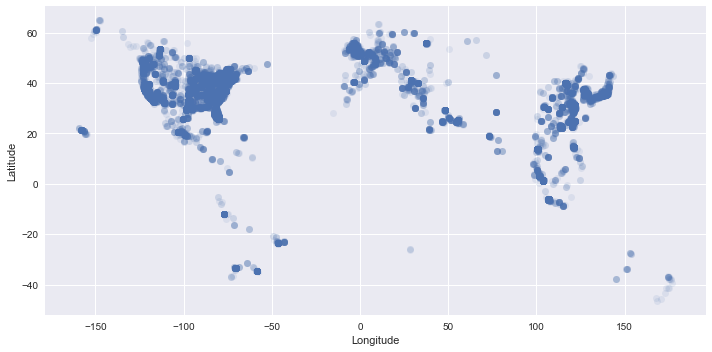

In [5]:
sns.lmplot(x='Longitude', y='Latitude', data = data,fit_reg=False,scatter_kws={'alpha':.1},size=5, aspect=2)

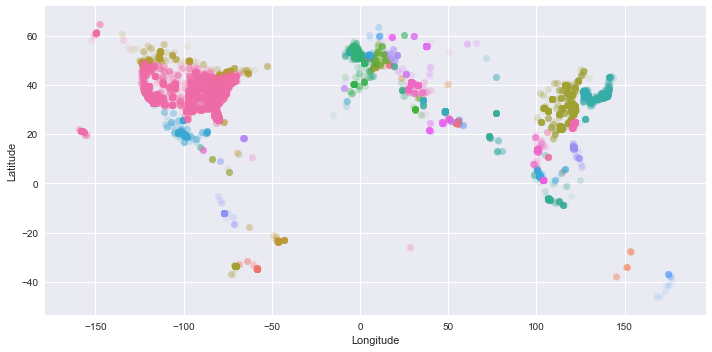

In [6]:
sns.lmplot(x='Longitude', y='Latitude', data = data, fit_reg=False,hue='Country',legend=False,scatter_kws={'alpha':.1},size=5, aspect=2)

In [7]:
data.apply(pd.notnull).all(axis=0)

Country        True
Longitude     False
Latitude      False
LocationId     True
dtype: bool

Both Longitude and Latitude have NAs or nulls in them

In [8]:
data.dropna(inplace= True)

In [9]:
data.reset_index(drop=True,inplace=True)

In [10]:
data.apply(pd.notnull).all(axis=0)

Country       True
Longitude     True
Latitude      True
LocationId    True
dtype: bool

In [11]:
x = np.array(data.Longitude.astype(np.float16))
y = np.array(data.Latitude.astype(np.float16))

# make a 2dim array of diffs
dx = x[:, np.newaxis] - x[np.newaxis,:]
dy = y[:, np.newaxis] - y[np.newaxis,:]

In [12]:
# stack the dx array and dy array
d = np.array([dx,dy])

#square and sum along 0 axis and then take square
out = (d**2).sum(axis=0)**0.5

# fill diagonal with a max number 10000
np.fill_diagonal(out,99)

In [13]:
data['min_dist'] = out.min(axis=1)

In [14]:
data.head()

,Country,Longitude,Latitude,LocationId,min_dist
0,AD,1.53,42.51,1,1.127930
1,AE,55.47,25.42,2,0.031250
2,AE,55.47,25.39,3,0.031250
3,AE,54.38,24.48,4,0.000000
4,AE,54.54,24.51,5,0.069885


In [15]:
data[data.min_dist == max(data['min_dist'])]

,Country,Longitude,Latitude,LocationId,min_dist
10664,RU,50.15,53.51,10666,10.859375


### This is the most isolated location: 10666 in RU

# Visualizing the most isolation location (LocationID 10666)

In [16]:
from bokeh.plotting import figure,show,ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import  HoverTool

output_notebook()

Loading BokehJS ...

In [23]:
TOOLS="hover,crosshair,pan,tap,zoom_in,zoom_out,reset,save"

p = figure(tools = TOOLS,plot_width=700, plot_height=400, title=None)

color = []
alpha = []
radii = []
max_dist = max(data['min_dist'])

for i in data.min_dist:
    if i == max_dist:
        color.append('red')
        alpha.append(1)
        radii.append(3)
    else:
        color.append('darkgray')
        alpha.append(0.1)
        radii.append(2)
    
source = ColumnDataSource(data=dict(
    x=data.Longitude,
    y=data.Latitude,
    LocationId = data.LocationId,
    min_dist = data.min_dist,
    cntry = data.Country,
    colors=color,
    alpha=alpha
    ))

p.scatter(x, y,source = source,
          fill_alpha=alpha,
          color = color,
          radius=radii)

p.xaxis.axis_label="Longitude"
p.yaxis.axis_label="Latitude"
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

hover = p.select(dict(type=HoverTool))
hover.tooltips = [("LocationId", "@LocationId"),
                  ("Latitude, Longitude", "@x , @y"),
                  ("Country","@cntry"),
                  ("Distance from Closest Point","@min_dist")]
hover.mode = 'mouse'

show(p)

/Users/Avi/anaconda/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/Avi/anaconda/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/Avi/anaconda/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/Avi/anaconda/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values

In [18]:
data_index = {}

for i in data.Country:
    data_index[data.Country] = data.iloc[data.Country == i])

SyntaxError: invalid syntax (<ipython-input-18-e4acc3c58c17>, line 4)

In [ ]:
data.loc[data.Country == "ZA"]

In [ ]:
p= data.loc[data.Country == "ZA"].index
p

In [ ]:
g = out[,25596:25599]
most_isolated['za'] = max(g.min(axis=1))

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.tail()

In [19]:
?p.scatter